In [2]:
%matplotlib inline
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# load and visualise the tooth edge annotations
# Setup environments
import json

In [3]:

dataDir = os.path.join("C:\MIL_Src\data\points\consolidated\Caries Markup","C-MIL_Src-data-images-setB")
print(dataDir)
annotation_json = os.path.join(dataDir,"image8.tif.edges.json")
json_file = open(annotation_json)
mil_json = json.load(json_file)
json_file.close()
print(mil_json)


.42, 'Y': 1156.56}, {'IsEmpty': False, 'X': 1204.07, 'Y': 1151.38}, {'IsEmpty': False, 'X': 1206.62, 'Y': 1146.14}, {'IsEmpty': False, 'X': 1209.15, 'Y': 1140.88}, {'IsEmpty': False, 'X': 1211.74, 'Y': 1135.65}, {'IsEmpty': False, 'X': 1214.45, 'Y': 1130.48}, {'IsEmpty': False, 'X': 1217.28, 'Y': 1125.39}, {'IsEmpty': False, 'X': 1220.17, 'Y': 1120.37}, {'IsEmpty': False, 'X': 1223.08, 'Y': 1115.34}, {'IsEmpty': False, 'X': 1225.93, 'Y': 1110.28}, {'IsEmpty': False, 'X': 1228.63, 'Y': 1105.14}, {'IsEmpty': False, 'X': 1231.07, 'Y': 1099.88}, {'IsEmpty': False, 'X': 1233.14, 'Y': 1094.49}, {'IsEmpty': False, 'X': 1234.9, 'Y': 1089.02}, {'IsEmpty': False, 'X': 1236.41, 'Y': 1083.47}, {'IsEmpty': False, 'X': 1237.78, 'Y': 1077.86}, {'IsEmpty': False, 'X': 1239.06, 'Y': 1072.21}, {'IsEmpty': False, 'X': 1240.31, 'Y': 1066.52}, {'IsEmpty': False, 'X': 1241.53, 'Y': 1060.76}, {'IsEmpty': False, 'X': 1242.75, 'Y': 1054.93}, {'IsEmpty': False, 'X': 1244.19, 'Y': 1049.02}, {'IsEmpty': False, 'X

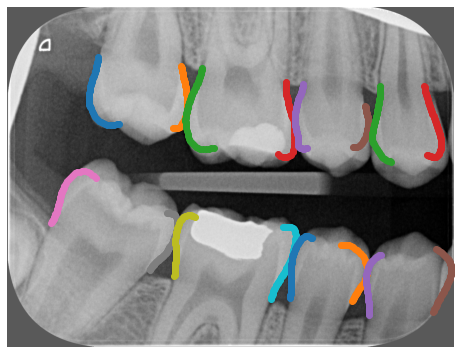

In [16]:
# Take a close look at the data - try to display it!
mil_json['Teeth'][0]
#filename = mil_json['Filename']
#tooth = mil_json['Teeth'][0]

# Show the image
I = io.imread(mil_json['Filename'])
plt.axis('off')
plt.imshow(I)

# Extract the edge points

leftEdgePointX = tooth['LeftEdge']['EdgePoints'][0]['X']
leftEdgePointY = tooth['LeftEdge']['EdgePoints'][0]['Y']

for tooth in mil_json['Teeth']:
    LeftX = []
    LeftY = []
    for point in tooth['LeftEdge']['EdgePoints']:
        LeftX.append(point['X'])
        LeftY.append(point['Y'])

    plt.plot(LeftX,LeftY,'o')
    
    RightX = []
    RightY = []
    for point in tooth['RightEdge']['EdgePoints']:
        RightX.append(point['X'])
        RightY.append(point['Y'])

    plt.plot(RightX,RightY,'o')

plt.show()




In [ ]:

dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [ ]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

In [ ]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

In [ ]:
# get all images containing given categories, select one at random
catIds = coco.getCatIds(catNms=['person','dog','skateboard']);
imgIds = coco.getImgIds(catIds=catIds );
imgIds = coco.getImgIds(imgIds = [324158])
img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]

In [ ]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [ ]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [ ]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

In [ ]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [ ]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

In [ ]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()